# Day 3: Python Basics


go to Project Euler (https://projecteuler.net/archives) and use Python to solve at least 10 problems. Try to choose problems that allow you to practice using dictionaries, list comprehensions, and other Pythonic features.

### 1. Problem 1 - Multiples of 3 and 5
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

https://projecteuler.net/problem=1

In [9]:
# Practice functions and list comprehensions
def find_multiples(x, n):
    '''
    find all multiples of x between x and n
    ''' 
    multiples = []
    [multiples.append(i) for i in range(x,n+1) if i % x == 0]
    return multiples

def find_multiples_of_3_and_5(n):
    '''
    find all multiples of 3 and 5 between below n
    ''' 
    multiples_of_3 = find_multiples(3,n)
    multiples_of_5 = find_multiples(5,n)
    return multiples_of_3 + multiples_of_5

print(sum(find_multiples_of_3_and_5(1000)))

267333


### 2. Problem 2 - Even Fibonacci numbers

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.
https://projecteuler.net/problem=2

In [28]:
def fibo_even_sum(L):
    '''
    Compute the sum of all even numbers in the fibonacci sequence below a limit value L
    '''
    if L < 0:
        raise ValueError('Fibonacci sequence of length smaller than 0 does not exist')
    if L == 0:
        return None
    elif L == 1:
        return 0
    elif L == 2:
        return 1
    else:
        result = []
        seq = [0, 1]
        i = 1
        while seq[i-1] < L:
            i += 1
            seq.append(seq[i-1] + seq[i-2])
            print(i, seq[i])
            if seq[i] % 2 == 0:
                result.append(seq[i])
        return sum(result)

In [31]:
print("Sum of even numbers below 4000000: ", fibo_even_sum(4000000))

2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
Sum of even numbers below 4000000:  4613732


### 3. Problem 10 - Summation of primes

The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.

https://projecteuler.net/problem=10

In [68]:
import numpy as np

def find_primes(n):
    '''
    Find primes below n
    '''
    small_primes = [2]
    number_bag = np.arange(0, n, 1, int)
    might_be_prime = np.ones((1, n))
    might_be_prime[0,0:2] = 0
    i = 2
    while i < n-1:
        i += 1
        if might_be_prime[0,i]:
            not_a_prime = False
            for p in small_primes[0:round(i/2)]:
                if i % p == 0:
                    not_a_prime = True
                    continue
            if not_a_prime:
                continue
            else:
                small_primes.append(i)
                might_be_prime[0,np.arange(i, n, i, int)] = 0
    return small_primes
        

In [74]:
sum(find_primes(10))

17

In [73]:
sum(find_primes(2000000))

142913828922

### 4. Problem 25 - 1000-digit Fibonacci number

The Fibonacci sequence is defined by the recurrence relation:

Fn = Fn−1 + Fn−2, where F1 = 1 and F2 = 1.
Hence the first 12 terms will be:

F1 = 1
F2 = 1
F3 = 2
F4 = 3
F5 = 5
F6 = 8
F7 = 13
F8 = 21
F9 = 34
F10 = 55
F11 = 89
F12 = 144
The 12th term, F12, is the first term to contain three digits.

What is the index of the first term in the Fibonacci sequence to contain 1000 digits?

https://projecteuler.net/problem=25

In [76]:
def first_fibo_with_n_digits(n):
    '''
    Find the index of the first term in the Fibonacci sequence that contains n digits.
    For example, I=12 for fibo(12)=144 is the first term with 3 digits.
    '''
    if n < 0:
        raise ValueError('Fibonacci sequence of length smaller than 0 does not exist')
    if n == 0:
        return None
    elif n == 1:
        return 0
    else:
        r = [0, 1]
        i = 1
        while len(str(r[i])) < n:
            i += 1
            r.append(r[i-1] + r[i-2])
            
        return i, r[i]

In [77]:
first_fibo_with_n_digits(3)

(12, 144)

In [78]:
first_fibo_with_n_digits(1000)

(4782,
 10700662663827589367649805844573968850836838966321516650132352033753145206046940406218891475824897926578046948881775919574843364666725699595129960304612627480924821861440694330512347744427502737817530875793916661921492591867595539664228371489431130746995034395470019854326097230672901928705264472437261177158218255484911205250132014786129659313817922355596574520395061375514678375432291196021299340482607061753977068470682028954869026661854351245219003694806413574474709117076197669456910700980243934396174741037369125032313655321647736970231677550515951735184605799549194109677783732296657965816465139034881542563101842241902598460880001101862555502454939371136516570394476295847145485234259504285824253060835444354282126110089928637950480068943303097732178348645431132057656598684562886168087186938352973506439862976406600007235629179052070511640776148124918858309459405666883391093509444565763576661516193177537928916615813271596168774879838218204925203484738743847367719345127870292186362

### 5. Problem 28 - Number spiral diagonals

Starting with the number 1 and moving to the right in a clockwise direction a 5 by 5 spiral is formed as follows:

21 22 23 24 25 <br>
20  7  8  9 10 <br>
19  6  1  2 11 <br>
18  5  4  3 12 <br>
17 16 15 14 13

It can be verified that the sum of the numbers on the diagonals is 101.

What is the sum of the numbers on the diagonals in a 1001 by 1001 spiral formed in the same way?

In [150]:
import numpy as np
import seaborn as sns

class number_spiral:
    
    def __init__(self,n=5):
        self.grid = np.zeros((n,n))
        self.x = int((n-1)/2)
        self.y = int((n-1)/2)
        self.grid[self.x, self.y] = 1
        self.steps = 1
        self.val = 1
        self.dir = 'east'
        self.makeSpiral(n)
        
    def takeStep(self):
        if self.dir == 'east':
            self.x = self.x + 1
            if self.grid[self.x, self.y - 1] == 0:
                self.dir = 'south'
        elif self.dir == 'south':
            self.y = self.y - 1
            if self.grid[self.x - 1, self.y] == 0:
                self.dir = 'west'
        elif self.dir == 'west':
            self.x = self.x - 1
            if self.grid[self.x, self.y + 1] == 0:
                self.dir = 'north'
        elif self.dir == 'north':
            self.y = self.y + 1
            if self.grid[self.x + 1, self.y] == 0:
                self.dir = 'east'
                
        self.grid[self.x, self.y] = self.val + 1
        self.val += 1
        self.steps += 1
            
    def makeSpiral(self,n):
        while self.steps < (n*n):
            self.takeStep()
            
    def diagonalSum(self):
        return (self.grid.trace() + np.flipud(self.grid).trace() - 1)
            
    def show(self):
        ax = sns.heatmap(self.grid, annot=True)

In [151]:
number_spiral(5).grid

array([[17., 18., 19., 20., 21.],
       [16.,  5.,  6.,  7., 22.],
       [15.,  4.,  1.,  8., 23.],
       [14.,  3.,  2.,  9., 24.],
       [13., 12., 11., 10., 25.]])

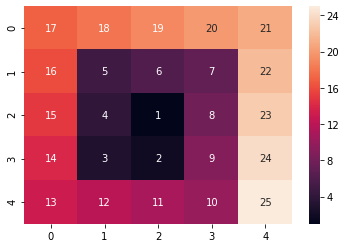

In [152]:
number_spiral(5).show()

In [153]:
number_spiral(5).diagonalSum()

101.0

In [154]:
number_spiral(1001).diagonalSum()

669171001.0

### 6. Problem 52 - Permuted multiples

It can be seen that the number, 125874, and its double, 251748, contain exactly the same digits, but in a different order.

Find the smallest positive integer, x, such that 2x, 3x, 4x, 5x, and 6x, contain the same digits.

In [173]:
def same_digits(a,b):
    '''
    a and b are integers. When they have the same digits return True
    '''
    astr = str(a)
    bstr = str(b)
    if len(astr) == len(bstr):
        astr = "".join(sorted(astr))
        bstr = "".join(sorted(bstr))
        if astr == bstr:
            return True
    return False

def find_same_digit_integer(n):
    '''
    Find the smallest positive integer, x, such that 2x, 3x, 4x, 5x, and 6x, 
    contain the same digits.
    Do not search beyond x = n
    '''
    for i in range(2,n):
        if same_digits(i, 2*i):
            if same_digits(i, 3*i):
                if same_digits(i, 4*i):
                    if same_digits(i, 5*i):
                        if same_digits(i, 6*i):
                            return [i, 2*i, 3*i, 4*i, 5*i, 6*i]
    print("nothing to be found below n = ", n)
    return 
    

In [172]:
a = 1212345
b = 5432112
print(same_digits(a,b))

a = 121234532
b = 5432112
print(same_digits(a,b))

True
False


In [178]:
find_same_digit_integer(1000000)

[142857, 285714, 428571, 571428, 714285, 857142]

### 7.  Problem 7 - 10001st prime

By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

https://projecteuler.net/problem=7

In [ ]:
import numpy as np

def find_primes(n):
    '''
    Find primes below n
    '''
    small_primes = [2]
    number_bag = np.arange(0, n, 1, int)
    might_be_prime = np.ones((1, n))
    might_be_prime[0,0:2] = 0
    i = 2
    while i < n-1:
        i += 1
        if might_be_prime[0,i]:
            not_a_prime = False
            for p in small_primes[0:round(i/2)]:
                if i % p == 0:
                    not_a_prime = True
                    continue
            if not_a_prime:
                continue
            else:
                small_primes.append(i)
                might_be_prime[0,np.arange(i, n, i, int)] = 0
    return small_primes

In [183]:
primes = find_primes(110000)

In [188]:
print("The 10001st prime is ", primes[10000])

The 10001st prime is  104743


### 8. Problem 49 - Prime permutations

The arithmetic sequence, 1487, 4817, 8147, in which each of the terms increases by 3330, is unusual in two ways: (i) each of the three terms are prime, and, (ii) each of the 4-digit numbers are permutations of one another.

There are no arithmetic sequences made up of three 1-, 2-, or 3-digit primes, exhibiting this property, but there is one other 4-digit increasing sequence.

What 12-digit number do you form by concatenating the three terms in this sequence?

https://projecteuler.net/problem=49

In [235]:
def same_digits(a,b):
    '''
    a and b are integers. When they have the same digits return True
    '''
    astr = str(a)
    bstr = str(b)
    if len(astr) == len(bstr):
        astr = "".join(sorted(astr))
        bstr = "".join(sorted(bstr))
        if astr == bstr:
            return True
    return False

def find_siblings(primes):
    '''
    returns a dictionary of primes with their siblings given an input list of
    possible primes. A sibling is simply a prime that has the same digits,
    but in a different order.
    '''
    sibling = {}
    for i, p in enumerate(primes):
        #if not is_increasing(p):
        #    continue
        remaining_primes = primes[i+1:]
        for q in remaining_primes:
            if same_digits(p, q):
                if p in sibling.keys():
                    sibling[p].append(q)
                else:
                    sibling[p] = [q]
    return sibling

In [236]:
# Get all 4 digit primes
four_digit_primes = [i for i in primes if (i > 999 and i < 10000)]

In [237]:
# Create dictionary of siblings for all 4 digit primes
siblings = find_siblings(four_digit_primes)
siblings

{1009: [9001],
 1013: [1031, 1103, 1301, 3011],
 1019: [1091, 1109, 1901, 9011],
 1021: [1201, 2011],
 1031: [1103, 1301, 3011],
 1033: [1303, 3301],
 1039: [1093, 3019, 3109, 9013, 9103],
 1049: [1409, 4019, 4091, 9041],
 1051: [5011, 5101],
 1061: [1601, 6011, 6101],
 1063: [3061, 6301],
 1069: [1609, 6091, 9601],
 1087: [8017],
 1091: [1109, 1901, 9011],
 1093: [3019, 3109, 9013, 9103],
 1097: [1709, 1907, 7019, 7109, 7901],
 1103: [1301, 3011],
 1109: [1901, 9011],
 1117: [1171],
 1123: [1213, 1231, 1321, 2113, 2131, 2311, 3121],
 1129: [1291],
 1151: [1511],
 1153: [1531, 3511, 5113],
 1163: [1361, 1613, 6113, 6131, 6311],
 1181: [1811, 8111],
 1187: [1871, 8117, 8171],
 1193: [1319, 1913, 1931, 3119, 3191, 3911, 9311],
 1201: [2011],
 1213: [1231, 1321, 2113, 2131, 2311, 3121],
 1217: [1721, 2711, 7121, 7211],
 1223: [2213, 3221],
 1229: [2129, 9221],
 1231: [1321, 2113, 2131, 2311, 3121],
 1237: [1327, 1723, 2137, 2371, 2713, 2731, 3217, 3271, 7213, 7321],
 1249: [1429, 4129, 42

In [241]:
# Find specific arithmetic sequence of primes
keys = siblings.keys()
arithmetic_keys = list()
for key in keys:
    seq = [key] + siblings[key]
    diffseq = [x - seq[i - 1] for i, x in enumerate(seq)][1:]
    for i, idiff in enumerate(diffseq):
        if (i+1) < (len(diffseq)):
            if idiff == diffseq[i+1]:
                arithmetic_keys.append(key)
                print("Primes =", key, siblings[key], "Difference =", idiff)

Primes = 2699 [2969, 6299, 9629] Difference = 3330
Primes = 2969 [6299, 9629] Difference = 3330


### 9. Problem 6 - Sum square difference

The sum of the squares of the first ten natural numbers is,

12+22+...+102=385
The square of the sum of the first ten natural numbers is,

(1+2+...+10)2=552=3025
Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is 3025−385=2640.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

https://projecteuler.net/problem=6

In [254]:
def sum_of_squares(n):
    '''
    Compute the sum of squares of the numbers from 1 to n
    '''
    return sum([i**2 for i in range(1,n+1)])

def square_of_sum(n):
    '''
    Compute the square of the sum of the numbers from 1 to n
    '''
    return sum([i for i in range(1,n+1)])**2

def sum_square_difference(n):
    '''
    Compute the difference between the square of the sum of
    the numbers from 1 to n and the sum of squares of the 
    numbers from 1 to n. 
    '''
    return square_of_sum(n) - sum_of_squares(n)

In [255]:
print(sum_of_squares(10))
print(square_of_sum(10))
print(sum_square_difference(10))

385
3025
2640


In [256]:
print(sum_of_squares(100))
print(square_of_sum(100))
print(sum_square_difference(100))

338350
25502500
25164150


### 10. Problem 17 - Number letter counts

If the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3 + 3 + 5 + 4 + 4 = 19 letters used in total.

If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?


NOTE: Do not count spaces or hyphens. For example, 342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.

https://projecteuler.net/problem=17

In [318]:
num2words1 = {1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', \
            6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine', 10: 'Ten', \
            11: 'Eleven', 12: 'Twelve', 13: 'Thirteen', 14: 'Fourteen', \
            15: 'Fifteen', 16: 'Sixteen', 17: 'Seventeen', 18: 'Eighteen', 19: 'Nineteen'}
num2words2 = ['Twenty', 'Thirty', 'Forty', 'Fifty', 'Sixty', 'Seventy', 'Eighty', 'Ninety']


def num2word(Number):
    if 0 < Number <= 19:
        return num2words1[Number]
    elif 20 <= Number <= 99:
        tens, remainder = divmod(Number, 10)
        return num2words2[tens - 2] + '-' + num2words1[remainder] if remainder else num2words2[tens - 2]
    elif Number == 100:
        return "One Hundred"
    elif 100 < Number <= 999:
        hundreds, remainder = divmod(Number, 100)
        tens, remainder = divmod(remainder, 10)
        return (num2words1[hundreds] + ' Hundred and ' 
                + num2words2[tens - 2] + '-' + num2words1[remainder] if remainder else num2words2[tens - 2])
    elif Number == 1000:
        return 'One Thousand'
    else:
        print('Number out of implemented range of numbers.')

In [319]:
print(num2word(0))
print(num2word(3))
print(num2word(33))
print(num2word(332))
print(num2word(1000))
print(num2word(1001))

Number out of implemented range of numbers.
None
Three
Thirty-Three
Three Hundred and Thirty-Two
One Thousand
Number out of implemented range of numbers.
None


In [320]:
# Go through all numbers from 1 to 1000, convert them to text, and add up all letters (excluding spaces)
num_letters = 0
for i in range(1, 1001):
    num_in_words = num2word(i).replace(" ", "").replace("-", "")
    num_letters += len(num_in_words)
    
print("After converting all numbers to words and adding up their letters from 1 to 1000, we obtain ", num_letters)

After converting all numbers to words and adding up their letters from 1 to 1000, we obtain  20669
